# Libraries

In [1]:
import sys
import sklearn
from sklearn import preprocessing
from sklearn.cluster import SpectralClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gower import gower_matrix
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Versions

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

# Circle

# K-means with Different Distance

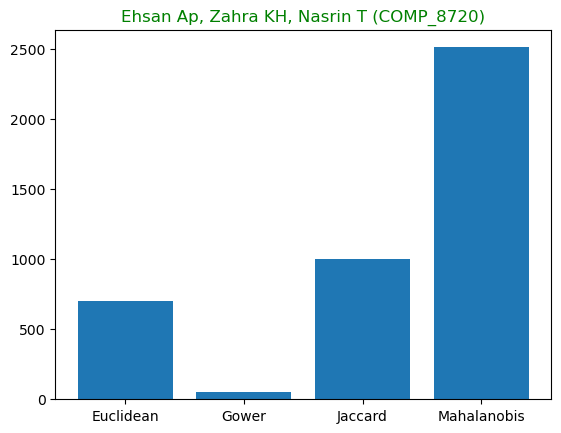

In [4]:
distance_functions = ['euclidean', 'gower', 'jaccard', 'mahalanobis']

jaccard_dist = np.zeros((len(X_circle), len(X_circle)))
for i in range(len(X_circle)):
    for j in range(i, len(X_circle)):
        num_diff = np.sum(X_circle[i] != X_circle[j])
        num_same = np.sum(X_circle[i] == X_circle[j])
        jaccard_dist[i, j] = num_diff / (num_diff + num_same)
        jaccard_dist[j, i] = jaccard_dist[i, j]

euclidean_dist = np.linalg.norm(X_circle[:, np.newaxis] - X_circle, axis=2)
gower_dist = gower_matrix(X_circle)
cov = np.cov(X_circle.T)
inv_cov = np.linalg.inv(cov)
mahalanobis_dist = pairwise_distances(X_circle, metric='mahalanobis', VI=inv_cov)

kmeans_euclidean = KMeans(n_clusters=2, random_state=0).fit(X_circle)
kmeans_gower = KMeans(n_clusters=2, random_state=0).fit(gower_dist)
kmeans_jaccard = KMeans(n_clusters=2, random_state=0).fit(jaccard_dist)
kmeans_mahalanobis = KMeans(n_clusters=2, random_state=0).fit(mahalanobis_dist)

wss_euclidean = sum(np.min(euclidean_dist[:, kmeans_euclidean.labels_], axis=1) ** 2)
wss_gower = sum(np.min(gower_dist[:, kmeans_gower.labels_], axis=1) ** 2)
wss_jaccard = sum(np.min(jaccard_dist[:, kmeans_jaccard.labels_], axis=1) ** 2)
wss_mahalanobis = sum(np.min(mahalanobis_dist[:, kmeans_mahalanobis.labels_], axis=1) ** 2)

fig, ax = plt.subplots()
ax.bar(['Euclidean', 'Gower', 'Jaccard', 'Mahalanobis'], [wss_euclidean, wss_gower, wss_jaccard, wss_mahalanobis])
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

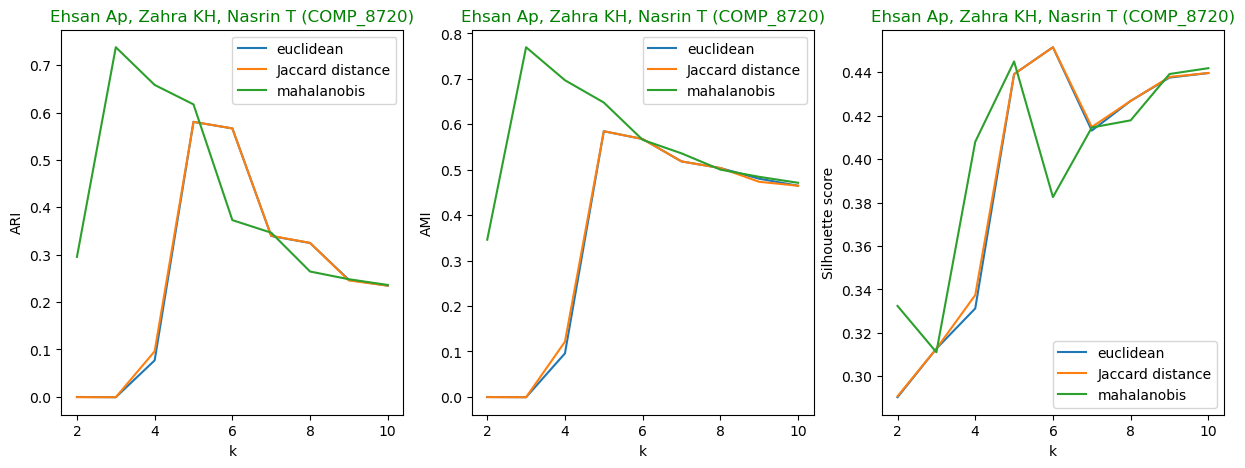

In [5]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

k_range = range(2, 11)

distance_functions = ['euclidean', 'Jaccard distance', 'mahalanobis']

ari = {dist_func: [] for dist_func in distance_functions}
ami = {dist_func: [] for dist_func in distance_functions}
sil = {dist_func: [] for dist_func in distance_functions}

for k in k_range:
    for dist_func in distance_functions:
        if dist_func == 'mahalanobis':
            cov = np.cov(X.values.T)
            inv_cov = np.linalg.inv(cov)
            dist_matrix = pairwise_distances(X, metric='mahalanobis', VI=inv_cov)
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(dist_matrix)
        else:
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(X)
        ari[dist_func].append(adjusted_rand_score(y_true, labels))
        ami[dist_func].append(adjusted_mutual_info_score(y_true, labels))
        sil[dist_func].append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for dist_func in distance_functions:
    ax[0].plot(k_range, ari[dist_func], label=dist_func)
    ax[1].plot(k_range, ami[dist_func], label=dist_func)
    ax[2].plot(k_range, sil[dist_func], label=dist_func)
ax[0].set_xlabel('k')
ax[0].set_ylabel('ARI')
ax[0].set_ylabel('ARI')
ax[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[0].legend()
ax[1].set_xlabel('k')
ax[1].set_ylabel('AMI')
ax[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[1].legend()
ax[2].set_xlabel('k')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[2].legend()
plt.show()

In [6]:
X = circle_csv[['x1', 'x2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.unique(km.labels_)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, km.labels_, sample_size=5, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              1.309131     99.508185   
1                   3              1.010948     16.520221   
2                   4              0.932088    110.359188   
3                   5              0.791192    187.340377   
4                   6              0.688415    212.648605   
5                   7              0.808750    135.982771   
6                   8              0.743900    458.124573   
7                   9              0.667065    242.796898   
8                  10              0.645458    270.380200   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               462.166352  0.476293        0.129840  
1               570.225310  0.476293        0.033779  
2               562.060727  0.476293        0.013130  
3               686.455657  0.476293        0.004986  
4               755.439654  0.476293        0.002530  
5               786.223529  0.476293        0.001672  
6   

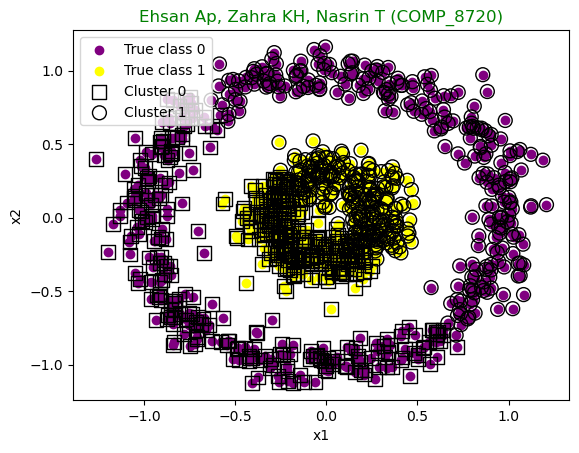

In [7]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

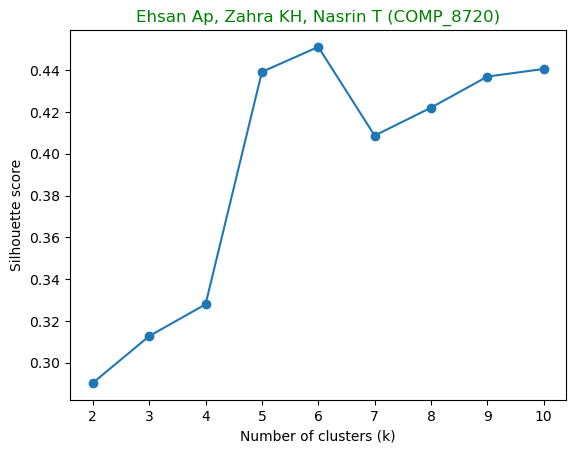

The best value of k is 6


In [8]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_circle)
    score = silhouette_score(X_circle, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

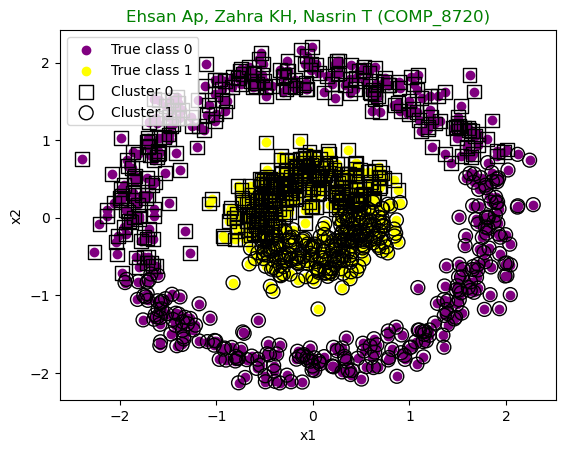

In [9]:
x_circle_col = circle_csv
x_circle_col = x_circle_col.drop('label', axis=1)
scaler_circle = preprocessing.StandardScaler()
scaler_circle.fit(X_circle)
scaled_X = scaler_circle.transform(X_circle)

xs = pd.DataFrame(scaled_X, columns=x_circle_col.columns)

from sklearn.mixture import GaussianMixture

gmm_circle = GaussianMixture(n_components=2)
gmm_y_circle = gmm_circle.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [10]:
ari = adjusted_rand_score(circle_csv['label'], labels)
ami = adjusted_mutual_info_score(circle_csv['label'], labels)
sil = silhouette_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)

Adjusted Rand Index (ARI): -0.0004250258817531536
Adjusted Mutual Information (AMI): -0.000306995698656282
Silhouette Coefficient: 0.2905266339398138


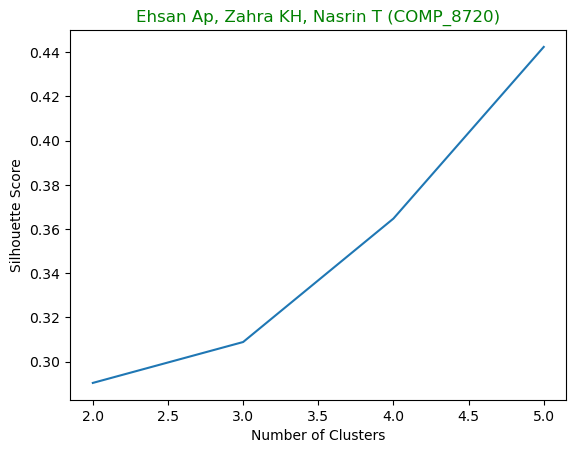

In [11]:
# Extract features
X = circle_csv[['x1', 'x2']]

# Evaluate EM clustering using Silhouette score
em_scores = []
for n_components in range(2, 6):
    em = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    em_labels = em.predict(X)
    em_scores.append(silhouette_score(X, em_labels))

# Plot Silhouette scores for EM
fig, ax = plt.subplots()
ax.plot(range(2, 6), em_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('EM Silhouette Scores')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Spectural

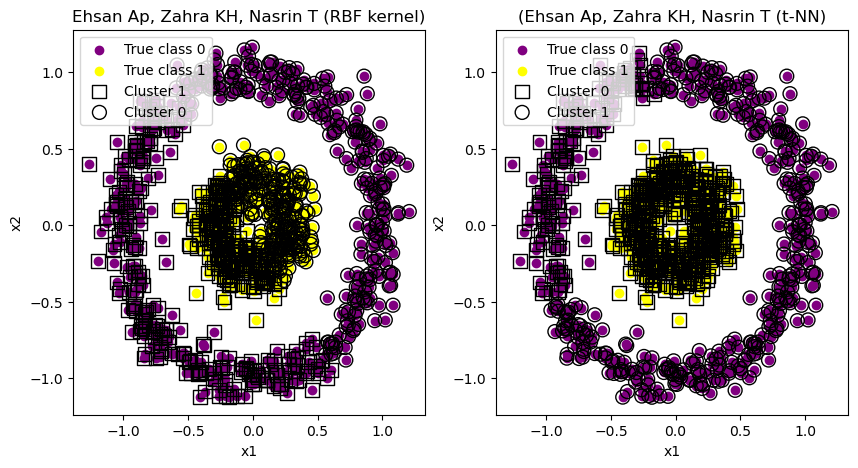

In [12]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


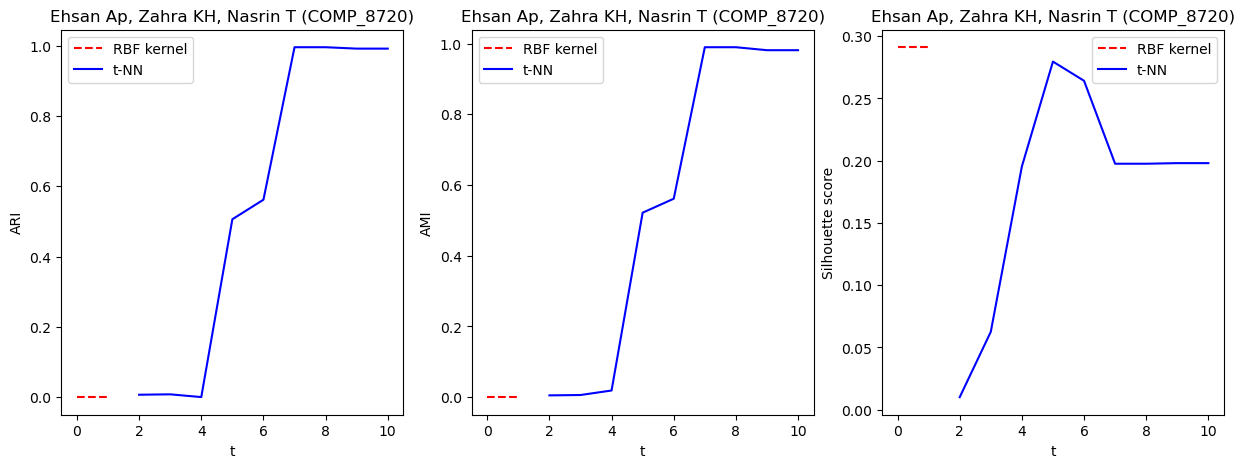

In [13]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[0].legend()
ax[1].plot([0, 1], [ami_rbf, ami_rbf], 'r--', label='RBF kernel')
ax[1].plot(t_range, ami_tnn, 'b-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('AMI')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[2].legend()
plt.show()

# Moons

# K-means with Different Distance

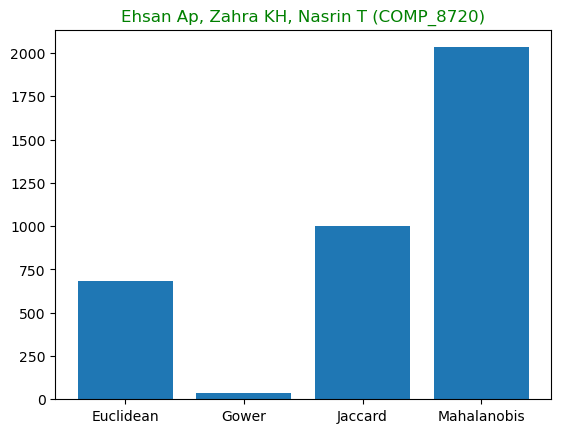

In [14]:
distance_functions = ['euclidean', 'gower', 'jaccard', 'mahalanobis']

jaccard_dist = np.zeros((len(X_moons), len(X_moons)))
for i in range(len(X_moons)):
    for j in range(i, len(X_moons)):
        num_diff = np.sum(X_moons[i] != X_moons[j])
        num_same = np.sum(X_moons[i] == X_moons[j])
        jaccard_dist[i, j] = num_diff / (num_diff + num_same)
        jaccard_dist[j, i] = jaccard_dist[i, j]

euclidean_dist = np.linalg.norm(X_moons[:, np.newaxis] - X_moons, axis=2)
gower_dist = gower_matrix(X_moons)
cov = np.cov(X_moons.T)
inv_cov = np.linalg.inv(cov)
mahalanobis_dist = pairwise_distances(X_moons, metric='mahalanobis', VI=inv_cov)

kmeans_euclidean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
kmeans_gower = KMeans(n_clusters=2, random_state=0).fit(gower_dist)
kmeans_jaccard = KMeans(n_clusters=2, random_state=0).fit(jaccard_dist)
kmeans_mahalanobis = KMeans(n_clusters=2, random_state=0).fit(mahalanobis_dist)

wss_euclidean = sum(np.min(euclidean_dist[:, kmeans_euclidean.labels_], axis=1) ** 2)
wss_gower = sum(np.min(gower_dist[:, kmeans_gower.labels_], axis=1) ** 2)
wss_jaccard = sum(np.min(jaccard_dist[:, kmeans_jaccard.labels_], axis=1) ** 2)
wss_mahalanobis = sum(np.min(mahalanobis_dist[:, kmeans_mahalanobis.labels_], axis=1) ** 2)

fig, ax = plt.subplots()
ax.bar(['Euclidean', 'Gower', 'Jaccard', 'Mahalanobis'], [wss_euclidean, wss_gower, wss_jaccard, wss_mahalanobis])
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

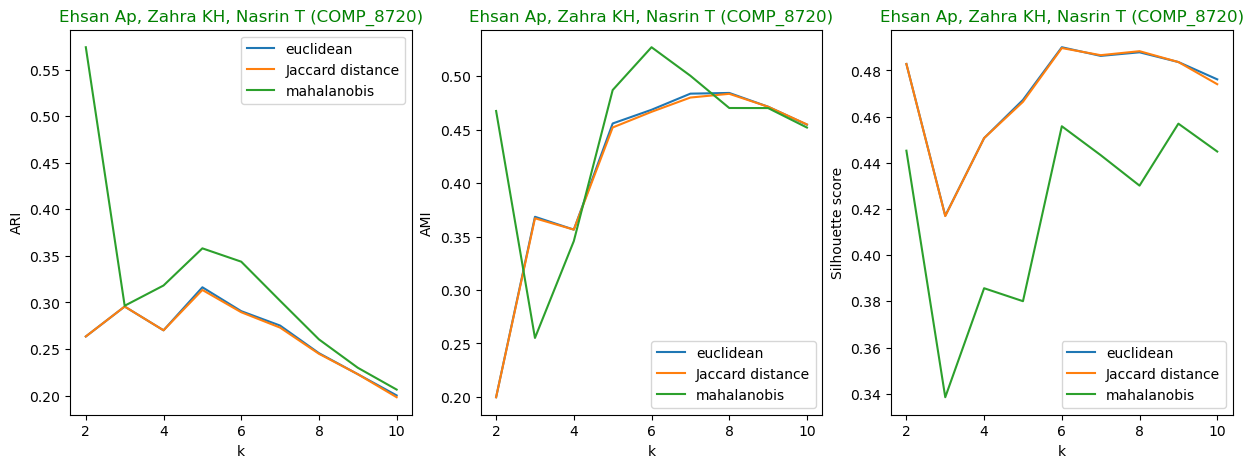

In [15]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

k_range = range(2, 11)

distance_functions = ['euclidean', 'Jaccard distance', 'mahalanobis']

ari = {dist_func: [] for dist_func in distance_functions}
ami = {dist_func: [] for dist_func in distance_functions}
sil = {dist_func: [] for dist_func in distance_functions}

for k in k_range:
    for dist_func in distance_functions:
        if dist_func == 'mahalanobis':
            cov = np.cov(X.values.T)
            inv_cov = np.linalg.inv(cov)
            dist_matrix = pairwise_distances(X, metric='mahalanobis', VI=inv_cov)
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(dist_matrix)
        else:
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(X)
        ari[dist_func].append(adjusted_rand_score(y_true, labels))
        ami[dist_func].append(adjusted_mutual_info_score(y_true, labels))
        sil[dist_func].append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for dist_func in distance_functions:
    ax[0].plot(k_range, ari[dist_func], label=dist_func)
    ax[1].plot(k_range, ami[dist_func], label=dist_func)
    ax[2].plot(k_range, sil[dist_func], label=dist_func)
ax[0].set_xlabel('k')
ax[0].set_ylabel('ARI')
ax[0].set_ylabel('ARI')
ax[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[0].legend()
ax[1].set_xlabel('k')
ax[1].set_ylabel('AMI')
ax[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[1].legend()
ax[2].set_xlabel('k')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[2].legend()
plt.show()

In [16]:
X = moons_csv[['x1', 'x2']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.unique(km.labels_)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, km.labels_, sample_size=5, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              0.816856     16.131832   
1                   3              0.907113     35.520185   
2                   4              0.935856    112.341549   
3                   5              0.762208    421.822239   
4                   6              0.692200    328.560774   
5                   7              0.709762    308.921569   
6                   8              0.681230   1159.270430   
7                   9              0.661078    175.890417   
8                  10              0.641098    415.940532   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0              1250.244829  0.324091        0.067577  
1              1004.249089  0.324091        0.020665  
2              1070.221812  0.324091        0.007446  
3              1306.857598  0.324091        0.003309  
4              1689.236835  0.324091        0.001843  
5              1803.251392  0.324091        0.001082  
6   

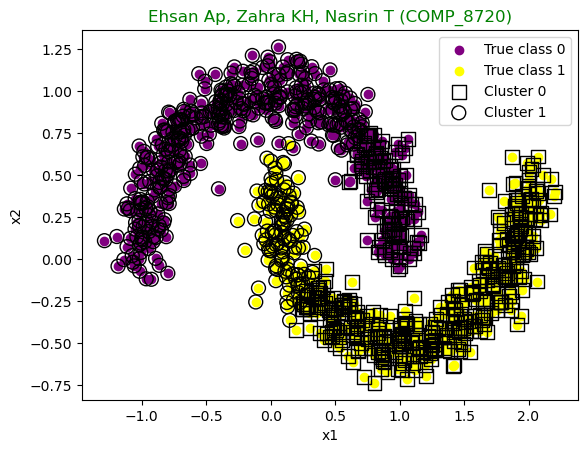

In [17]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

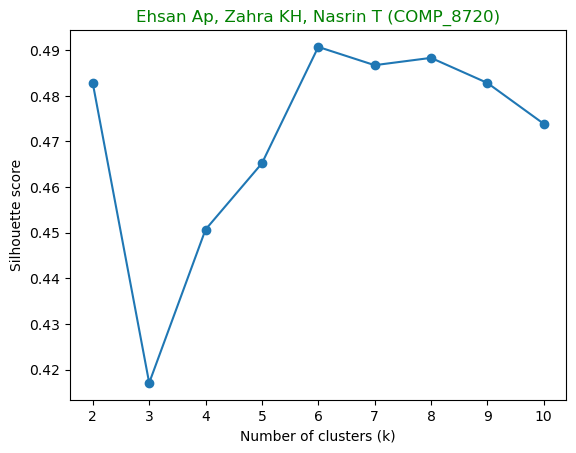

The best value of k is 6


In [18]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_moons)
    score = silhouette_score(X_moons, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

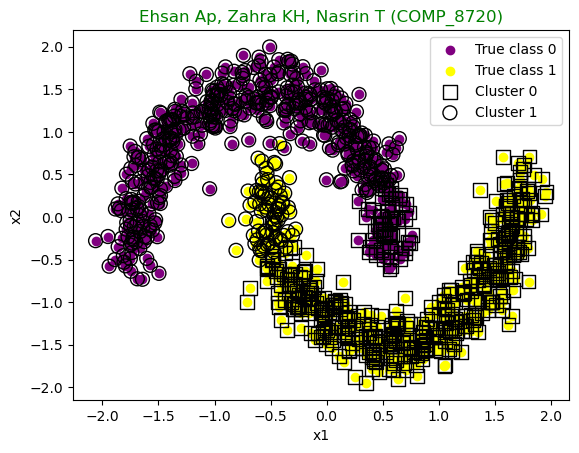

In [19]:
x_moons_col = moons_csv
x_moons_col = x_moons_col.drop('label', axis=1)
scaler_moons = preprocessing.StandardScaler()
scaler_moons.fit(X_moons)
scaled_X = scaler_moons.transform(X_moons)

xs = pd.DataFrame(scaled_X, columns=x_moons_col.columns)

from sklearn.mixture import GaussianMixture

gmm_moons = GaussianMixture(n_components=2)
gmm_y_moons = gmm_moons.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [20]:
ari = adjusted_rand_score(moons_csv['label'], labels)
ami = adjusted_mutual_info_score(moons_csv['label'], labels)
sil = silhouette_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)

Adjusted Rand Index (ARI): 0.5093052561375445
Adjusted Mutual Information (AMI): 0.408340359431295
Silhouette Coefficient: 0.45941350943439885


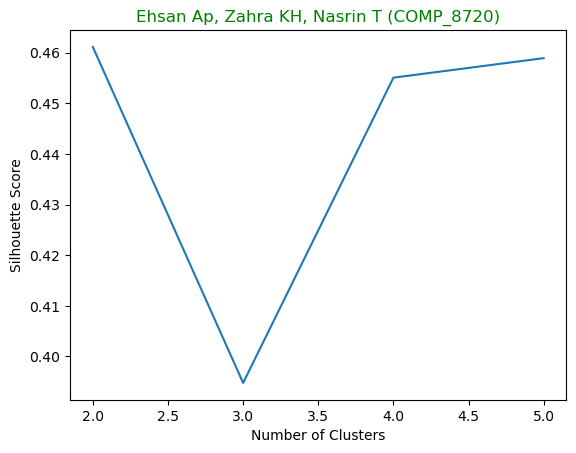

In [21]:
# Extract features
X = moons_csv[['x1', 'x2']]

# Evaluate EM clustering using Silhouette score
em_scores = []
for n_components in range(2, 6):
    em = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    em_labels = em.predict(X)
    em_scores.append(silhouette_score(X, em_labels))

# Plot Silhouette scores for EM
fig, ax = plt.subplots()
ax.plot(range(2, 6), em_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('EM Silhouette Scores')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Spectural

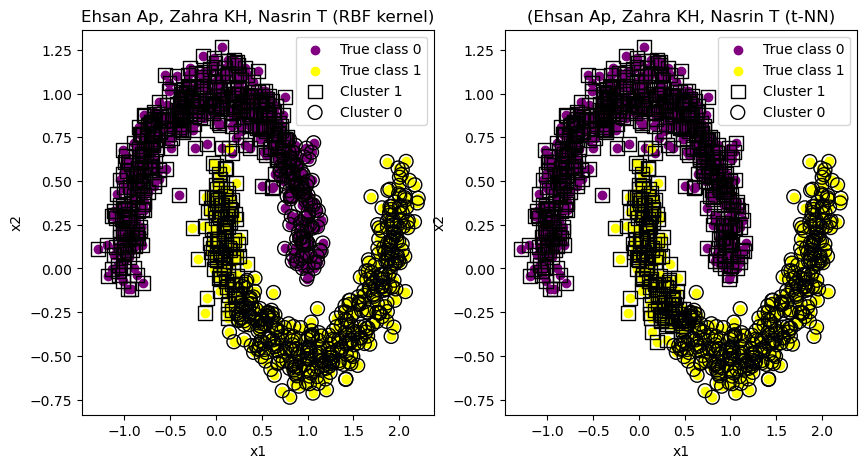

In [22]:
X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


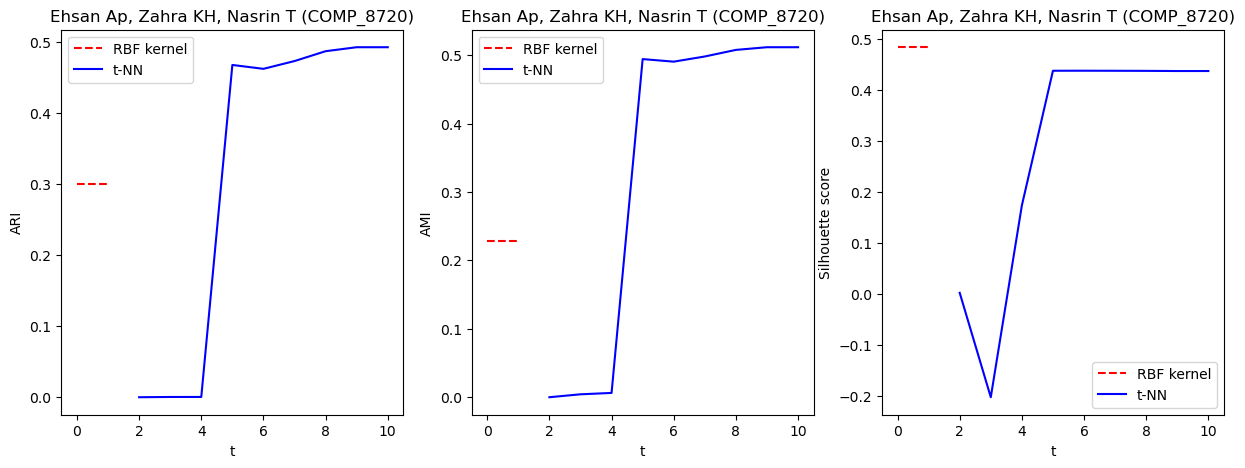

In [23]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

X = moons_csv[['x1', 'x2']]
y_true = moons_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[0].legend()
ax[1].plot([0, 1], [ami_rbf, ami_rbf], 'r--', label='RBF kernel')
ax[1].plot(t_range, ami_tnn, 'b-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('AMI')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[2].legend()
plt.show()

# Spiral

# K-means with Different Distance

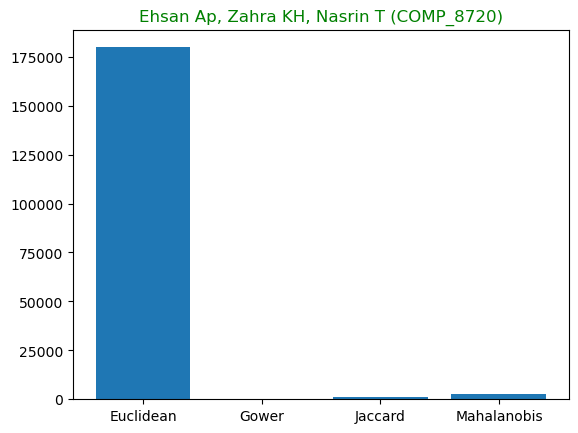

In [24]:
distance_functions = ['euclidean', 'gower', 'jaccard', 'mahalanobis']

jaccard_dist = np.zeros((len(X_spiral), len(X_spiral)))
for i in range(len(X_spiral)):
    for j in range(i, len(X_spiral)):
        num_diff = np.sum(X_spiral[i] != X_spiral[j])
        num_same = np.sum(X_spiral[i] == X_spiral[j])
        jaccard_dist[i, j] = num_diff / (num_diff + num_same)
        jaccard_dist[j, i] = jaccard_dist[i, j]

euclidean_dist = np.linalg.norm(X_spiral[:, np.newaxis] - X_spiral, axis=2)
gower_dist = gower_matrix(X_spiral)
cov = np.cov(X_spiral.T)
inv_cov = np.linalg.inv(cov)
mahalanobis_dist = pairwise_distances(X_spiral, metric='mahalanobis', VI=inv_cov)

kmeans_euclidean = KMeans(n_clusters=2, random_state=0).fit(X_spiral)
kmeans_gower = KMeans(n_clusters=2, random_state=0).fit(gower_dist)
kmeans_jaccard = KMeans(n_clusters=2, random_state=0).fit(jaccard_dist)
kmeans_mahalanobis = KMeans(n_clusters=2, random_state=0).fit(mahalanobis_dist)

wss_euclidean = sum(np.min(euclidean_dist[:, kmeans_euclidean.labels_], axis=1) ** 2)
wss_gower = sum(np.min(gower_dist[:, kmeans_gower.labels_], axis=1) ** 2)
wss_jaccard = sum(np.min(jaccard_dist[:, kmeans_jaccard.labels_], axis=1) ** 2)
wss_mahalanobis = sum(np.min(mahalanobis_dist[:, kmeans_mahalanobis.labels_], axis=1) ** 2)

fig, ax = plt.subplots()
ax.bar(['Euclidean', 'Gower', 'Jaccard', 'Mahalanobis'], [wss_euclidean, wss_gower, wss_jaccard, wss_mahalanobis])
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Kmeans with Different Distance Plot

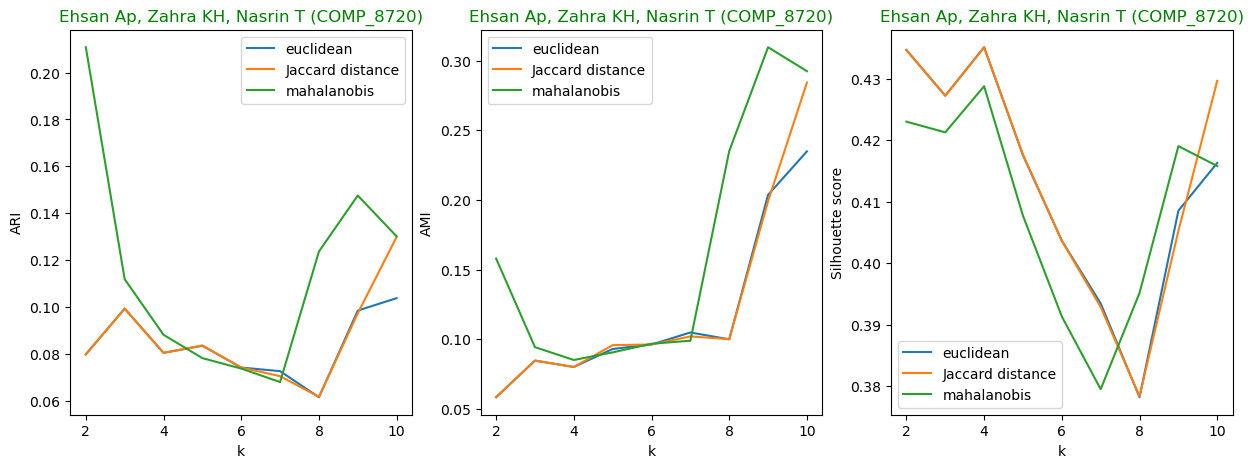

In [26]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

k_range = range(2, 11)

distance_functions = ['euclidean', 'Jaccard distance', 'mahalanobis']

ari = {dist_func: [] for dist_func in distance_functions}
ami = {dist_func: [] for dist_func in distance_functions}
sil = {dist_func: [] for dist_func in distance_functions}

for k in k_range:
    for dist_func in distance_functions:
        if dist_func == 'mahalanobis':
            cov = np.cov(X.values.T)
            inv_cov = np.linalg.inv(cov)
            dist_matrix = pairwise_distances(X, metric='mahalanobis', VI=inv_cov)
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(dist_matrix)
        else:
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(X)
        ari[dist_func].append(adjusted_rand_score(y_true, labels))
        ami[dist_func].append(adjusted_mutual_info_score(y_true, labels))
        sil[dist_func].append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for dist_func in distance_functions:
    ax[0].plot(k_range, ari[dist_func], label=dist_func)
    ax[1].plot(k_range, ami[dist_func], label=dist_func)
    ax[2].plot(k_range, sil[dist_func], label=dist_func)
ax[0].set_xlabel('k')
ax[0].set_ylabel('ARI')
ax[0].set_ylabel('ARI')
ax[0].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[0].legend()
ax[1].set_xlabel('k')
ax[1].set_ylabel('AMI')
ax[1].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[1].legend()
ax[2].set_xlabel('k')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
ax[2].legend()
plt.show()

In [27]:
X = spiral_csv[['x', 'y']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

np.unique(km.labels_)

db_scores = []
di_scores = []
ch_scores = []
i_scores = []
xb_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))
    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    xb_scores.append(np.sum(min_distances**2) / (k * np.sum(distances**2)))
    i_scores.append(silhouette_score(X, km.labels_, sample_size=5, random_state=48))

    distances = pairwise_distances(X_scaled, kmeans.cluster_centers_, metric='euclidean')
    min_distances = np.min(distances, axis=1)
    center_distances = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')
    intercluster_distances = np.max(center_distances)
    intracluster_distances = np.min(min_distances)
    di_scores.append(intercluster_distances / intracluster_distances)


scores_table = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Davies-Bouldin Index': db_scores,
    'Dunn’s Index': di_scores,
    'Calinski-Harabasz Index': ch_scores,
    'Index I': i_scores,
    'Xie-Beni Index': xb_scores
})

print(scores_table)

   Number of Clusters  Davies-Bouldin Index  Dunn’s Index  \
0                   2              0.949054     47.334568   
1                   3              0.838611     55.717990   
2                   4              0.790100     95.108701   
3                   5              0.784989     58.209607   
4                   6              0.803370    100.033576   
5                   7              0.818584     73.492390   
6                   8              0.851613    265.919438   
7                   9              0.765325    227.775139   
8                  10              0.721971    457.454204   

   Calinski-Harabasz Index   Index I  Xie-Beni Index  
0               948.667747  0.274353        0.085686  
1               984.349459  0.274353        0.022446  
2              1213.377735  0.274353        0.007539  
3              1250.503696  0.274353        0.003632  
4              1314.191521  0.274353        0.001969  
5              1298.445028  0.274353        0.001227  
6   

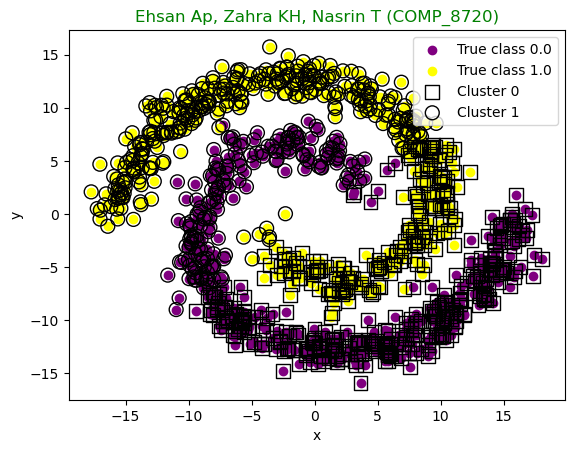

In [28]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

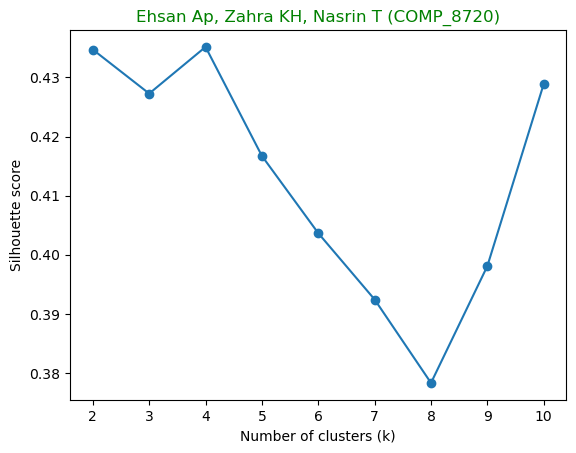

The best value of k is 4


In [29]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_spiral)
    score = silhouette_score(X_spiral, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

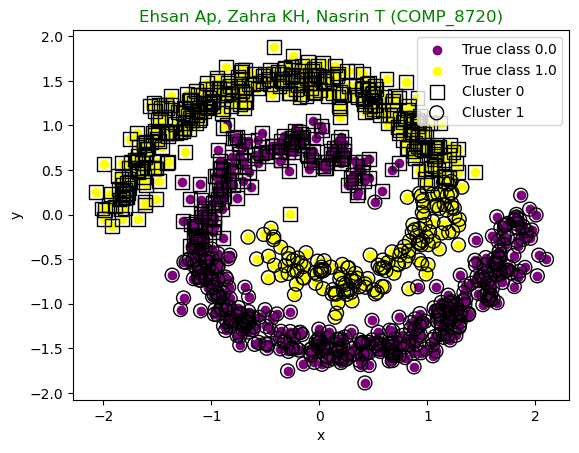

In [30]:
x_spiral_col = spiral_csv
x_spiral_col = x_spiral_col.drop('label', axis=1)
scaler_spiral = preprocessing.StandardScaler()
scaler_spiral.fit(X_spiral)
scaled_X = scaler_spiral.transform(X_spiral)

xs = pd.DataFrame(scaled_X, columns=x_spiral_col.columns)

from sklearn.mixture import GaussianMixture

gmm_spiral = GaussianMixture(n_components=2)
gmm_y_spiral = gmm_spiral.fit_predict(xs)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x'], xs[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x'], xs[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [31]:
ari = adjusted_rand_score(spiral_csv['label'], labels)
ami = adjusted_mutual_info_score(spiral_csv['label'], labels)
sil = silhouette_score(X, labels)

print('Adjusted Rand Index (ARI):', ari)
print('Adjusted Mutual Information (AMI):', ami)
print('Silhouette Coefficient:', sil)

Adjusted Rand Index (ARI): 0.17389709993958358
Adjusted Mutual Information (AMI): 0.1293686950257301
Silhouette Coefficient: 0.42961352994811947


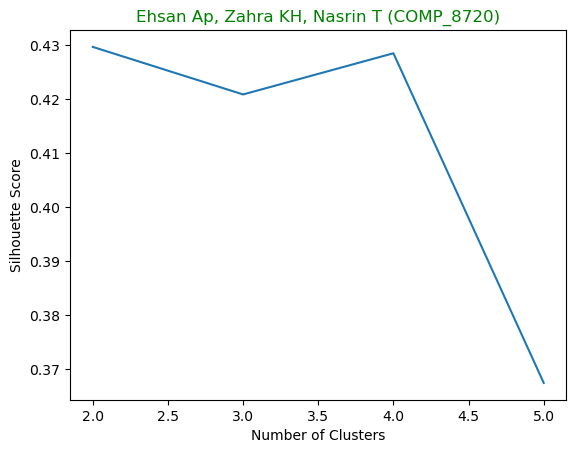

In [32]:
# Extract features
X = spiral_csv[['x', 'y']]

# Evaluate EM clustering using Silhouette score
em_scores = []
for n_components in range(2, 6):
    em = GaussianMixture(n_components=n_components, random_state=0).fit(X)
    em_labels = em.predict(X)
    em_scores.append(silhouette_score(X, em_labels))

# Plot Silhouette scores for EM
fig, ax = plt.subplots()
ax.plot(range(2, 6), em_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('EM Silhouette Scores')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Spectural

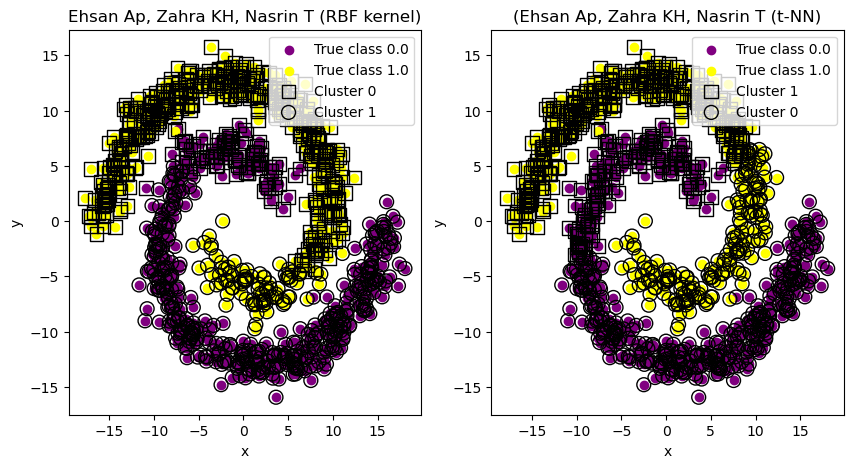

In [33]:
X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['purple', 'yellow']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (RBF kernel)')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors='black', facecolors='none',
                  label=f'Cluster {label}')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('(Ehsan Ap, Zahra KH, Nasrin T (t-NN)')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


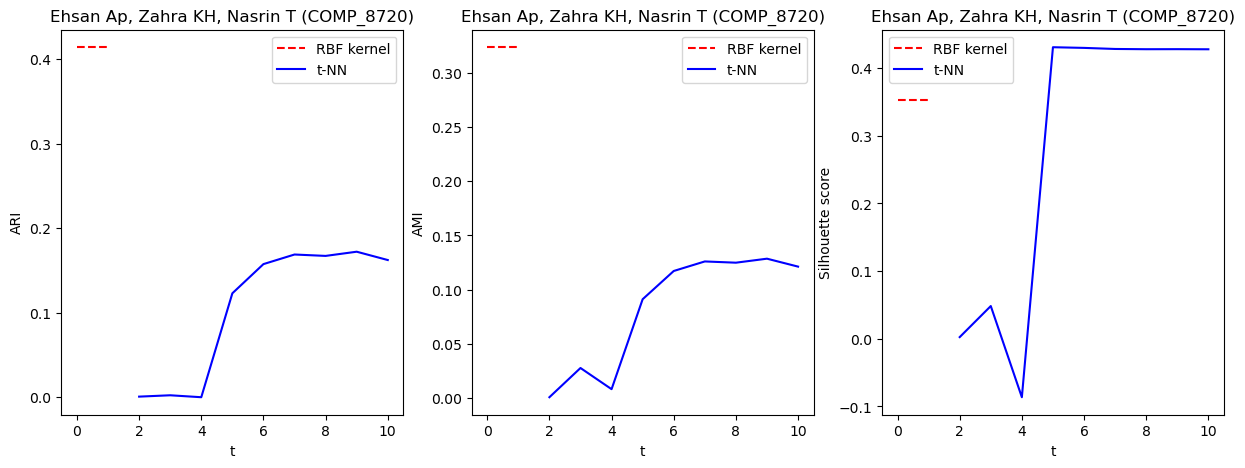

In [34]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

X = spiral_csv[['x', 'y']]
y_true = spiral_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[0].legend()
ax[1].plot([0, 1], [ami_rbf, ami_rbf], 'r--', label='RBF kernel')
ax[1].plot(t_range, ami_tnn, 'b-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('AMI')
ax[1].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
ax[2].legend()
plt.show()

# Twogaussians42